## Load data

In [1]:
clear all;
load('PDFestimateData','data');

In [2]:
N = size(data,2);       % # of samples
xmin = -5;
xmax = 15;
x = xmin:0.1:xmax;          % Points where we want to estimate the PDF

## 1D-kNN density estimator

In [3]:
% Fix k
k = 75;     % A suitable kernel size

% k-NN formula: phat(x) = k/(n*V)
% k-NN estimation
phat_knn = zeros(1,length(x));

for I=1:length(x)
    
    % compute distance from x(I) to the trainingData points
    distance = abs(x(I)-data);
    % sort
    sorted = sort(distance);
    % Choose the k'th farthest sample from x(I), and compute V
    V = 2*sorted(k);
    phat_knn(I) = k/(N*V);
end

## Histogram estimator

In [4]:
h = 1;      % suitable bin size
M = (xmax - xmin)/h;
dataInBins = zeros(M,1);
phat_histogram = zeros(1,length(x));

  
for n=1:N
    for m=0:M-1
        if (data(n)>=-5+h*m && data(n)<-4+h*m)
            dataInBins(m+1) = dataInBins(m+1) + 1;
        end
    end
end

for I=1:length(x)
     for m=0:M-1
        if (x(I)>=-5+h*m && x(I)<-4+h*m)
            phat_histogram(I) = dataInBins(m+1)/N*h;
        end
     end
end

## Kernel Method/Parzen Windows

In [5]:
K = @(z) 1/sqrt(2*pi)*exp(-z^2/2);  % gaussian kernel
% TODO: It is not correct
%K = @(z) 0.25*(sign(z+0.5)-sign(z-0.5))    
%smoothingparam = 0.5;   % reasonable kernel function spread (\sigma)
sigmahat = std(data);
smoothingparam = 1.06*sigmahat*N^(-1/5);
phat_parzen = zeros(1,length(x));

for I=1:length(x)
    SumOfKernels = 0;
    for i=1:N
        SumOfKernels = SumOfKernels + K((x(I)-data(i))/smoothingparam);
    end
    phat_parzen(I) = SumOfKernels/(smoothingparam*N);
end

## Matlab Built-in Function

In [6]:
[phat_parzen_matlab,~,bw] = ksdensity(data,x,'bandwidth',smoothingparam);

## Gaussian pdf

In [7]:
[mean_gaussian,sigma_gaussian] = normfit(data);
phat_gaussian = normpdf(x,mean_gaussian,sigma_gaussian);    % MLE 

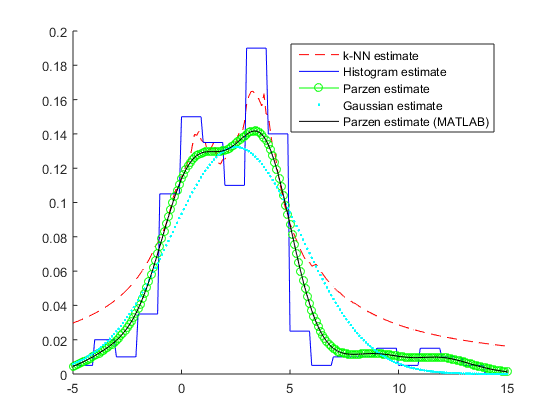

In [8]:
%%
figure('Name','Nonparametric density estimation','NumberTitle','off');
%plot(data,0,'ko','markersize',10)
hold on
plot(x,phat_knn,'--r',x,phat_histogram,'-b',x,phat_parzen,'-og',x,phat_gaussian,'.c',x,phat_parzen_matlab,'k')
legend('k-NN estimate','Histogram estimate','Parzen estimate','Gaussian estimate','Parzen estimate (MATLAB)')
% plot(data,0,'ko','markersize',10)
% hold on
% plot(x,phat_knn,'--r')
% plot(x,phat_histogram,'-b')
% plot(x,phat_parzen,'-og')
% plot(x,phat_gaussian,'.y')
% hold off
%legend('data','k-NN estimate','Histogram estimate','Parzen estimate','Gaussian estimate')